In [1]:
import sklearn
import numpy as np
import pandas as pd

Se carga el archivo y se separa en entrenamiento y prueba

In [2]:
from sklearn.model_selection import train_test_split
dataALL=pd.read_csv('games.csv')  
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

50286 40228 10058


In [3]:
train_data.shape

(40228, 18)

In [4]:
train_data.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,t1_towerKills,t1_inhibitorKills,t1_baronKills,t1_dragonKills,t1_riftHeraldKills,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,winner
25141,2083,1,1,2,1,1,2,6,0,1,3,0,7,1,0,1,1,2
3808,1396,2,2,2,0,2,2,1,0,0,0,0,10,2,0,3,1,2
10926,2105,2,1,1,1,1,2,9,2,2,3,0,5,0,0,0,1,1
46656,1684,1,2,2,2,2,0,0,0,0,0,0,10,3,1,2,0,2
35209,1622,1,2,2,2,2,2,0,0,0,0,0,10,4,1,3,1,2


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40228 entries, 25141 to 29153
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gameDuration        40228 non-null  int64
 1   firstBlood          40228 non-null  int64
 2   firstTower          40228 non-null  int64
 3   firstInhibitor      40228 non-null  int64
 4   firstBaron          40228 non-null  int64
 5   firstDragon         40228 non-null  int64
 6   firstRiftHerald     40228 non-null  int64
 7   t1_towerKills       40228 non-null  int64
 8   t1_inhibitorKills   40228 non-null  int64
 9   t1_baronKills       40228 non-null  int64
 10  t1_dragonKills      40228 non-null  int64
 11  t1_riftHeraldKills  40228 non-null  int64
 12  t2_towerKills       40228 non-null  int64
 13  t2_inhibitorKills   40228 non-null  int64
 14  t2_baronKills       40228 non-null  int64
 15  t2_dragonKills      40228 non-null  int64
 16  t2_riftHeraldKills  40228 non-null  

In [6]:
train_data[["gameDuration", "firstBlood","firstTower","firstInhibitor"]].describe()

,gameDuration,firstBlood,firstTower,firstInhibitor
count,40228.000000,40228.000000,40228.000000,40228.000000
mean,1871.576738,1.487347,1.484638,1.339291
std,451.038664,0.499846,0.500516,0.653435
min,613.000000,1.000000,0.000000,0.000000
25%,1554.000000,1.000000,1.000000,1.000000
50%,1847.000000,1.000000,1.000000,1.000000
75%,2156.000000,2.000000,2.000000,2.000000
max,4728.000000,2.000000,2.000000,2.000000


### Pipeline para los atributos numéricos

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 14 atributos numéricos
num_attribs = ["gameDuration", "firstBlood", "firstInhibitor", "firstTower","firstDragon","firstBaron","firstRiftHerald","t1_towerKills","t1_inhibitorKills","t1_baronKills","t1_dragonKills","t1_riftHeraldKills","t2_towerKills","t2_inhibitorKills","t2_baronKills","t2_dragonKills","t2_riftHeraldKills"]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])

### Pipeline completo

In [8]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

### Extraemos las etiquetas de clase

In [9]:
X_train = full_pipeline.fit_transform(train_data)

In [10]:
X_train.shape

(40228, 17)

In [11]:
X_train[0,:]

array([ 0.46875336, -0.97500648,  1.01114442, -0.96828847, -0.89773272,
        0.06113884,  1.52034576,  0.04483054, -0.82203612,  1.0537274 ,
        1.31441033, -0.58913922,  0.34515093, -0.00994963, -0.68603008,
       -0.35962024,  1.75567739])

In [12]:
y_train = train_data["winner"]
y_train

25141    2
3808     2
10926    1
46656    2
35209    2
        ..
36667    2
17775    1
16787    2
10955    2
29153    2
Name: winner, Length: 40228, dtype: int64

# Árboles de decisión
## Algoritmo DecisionTreeClassifier

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


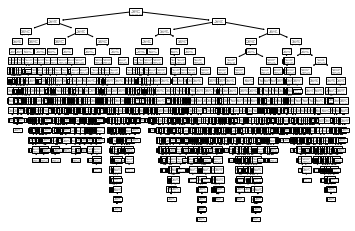

In [45]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo1= tree.DecisionTreeClassifier(criterion='gini',max_depth=100,splitter="best",random_state=123)
modelo1.fit(X_train, y_train)
scores1 = cross_val_score(modelo1, X_train, y_train, cv=5,scoring='accuracy')
print(scores1)
print(scores1.mean())

tree.plot_tree(modelo1)
tree.export_graphviz(decision_tree=modelo1, class_names=True,out_file="Arbol LOL 1.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


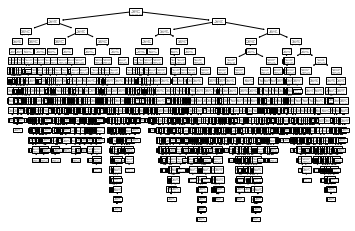

In [14]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo2 = tree.DecisionTreeClassifier(criterion='gini',max_depth=200,splitter="best",random_state=123)
modelo2.fit(X_train, y_train)
scores2 = cross_val_score(modelo2, X_train, y_train, cv=5, scoring='accuracy')
print(scores2)
print(scores2.mean())

tree.plot_tree(modelo2)
tree.export_graphviz(decision_tree=modelo2, class_names=True,out_file="Arbol LOL 2.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


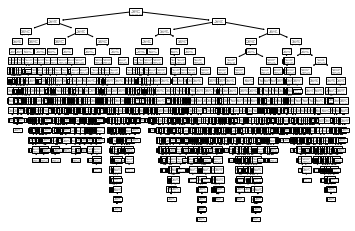

In [15]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo3 = tree.DecisionTreeClassifier(criterion='gini',max_depth=300,splitter="best",random_state=123)
modelo3.fit(X_train, y_train)
scores3 = cross_val_score(modelo3, X_train, y_train, cv=5, scoring='accuracy')
print(scores3)
print(scores3.mean())

tree.plot_tree(modelo3)
tree.export_graphviz(decision_tree=modelo3, class_names=True,out_file="Arbol LOL 3.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


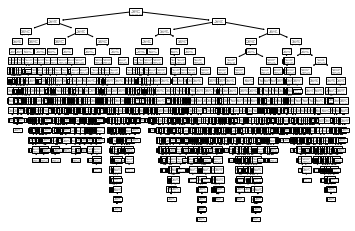

In [16]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo4 = tree.DecisionTreeClassifier(criterion='gini',max_depth=400,splitter="best",random_state=123)
modelo4.fit(X_train, y_train)
scores4 = cross_val_score(modelo4, X_train, y_train, cv=5, scoring='accuracy')
print(scores4)
print(scores4.mean())

tree.plot_tree(modelo4)
tree.export_graphviz(decision_tree=modelo4, class_names=True,out_file="Arbol LOL 4.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


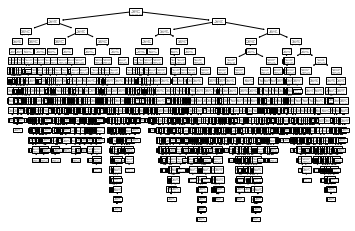

In [17]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo5 = tree.DecisionTreeClassifier(criterion='gini',max_depth=500,splitter="best",random_state=123)
modelo5.fit(X_train, y_train)
scores5 = cross_val_score(modelo5, X_train, y_train, cv=5, scoring='accuracy')
print(scores5)
print(scores5.mean())

tree.plot_tree(modelo5)
tree.export_graphviz(decision_tree=modelo5, class_names=True,out_file="Arbol LOL 5.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


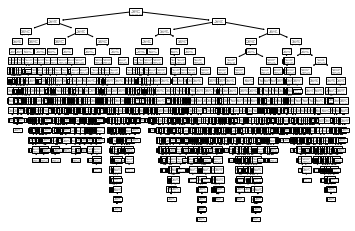

In [18]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo6 = tree.DecisionTreeClassifier(criterion='gini',max_depth=600,splitter="best",random_state=123)
modelo6.fit(X_train, y_train)
scores6 = cross_val_score(modelo6, X_train, y_train, cv=5, scoring='accuracy')
print(scores6)
print(scores6.mean())

tree.plot_tree(modelo6)
tree.export_graphviz(decision_tree=modelo6, class_names=True,out_file="Arbol LOL 6.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


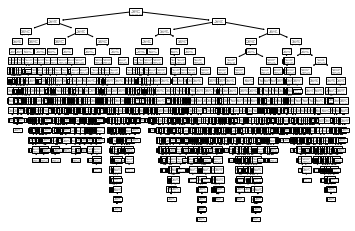

In [19]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo7 = tree.DecisionTreeClassifier(criterion='gini',max_depth=700,splitter="best",random_state=123)
modelo7.fit(X_train, y_train)
scores7 = cross_val_score(modelo7, X_train, y_train, cv=5, scoring='accuracy')
print(scores7)
print(scores7.mean())

tree.plot_tree(modelo7)
tree.export_graphviz(decision_tree=modelo7, class_names=True,out_file="Arbol LOL 7.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


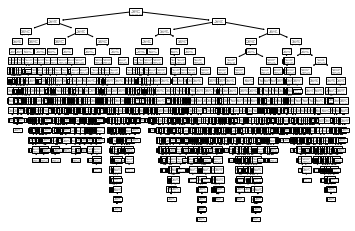

In [20]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo8 = tree.DecisionTreeClassifier(criterion='gini',max_depth=800,splitter="best",random_state=123)
modelo8.fit(X_train, y_train)
scores8 = cross_val_score(modelo8, X_train, y_train, cv=5, scoring='accuracy')
print(scores8)
print(scores8.mean())

tree.plot_tree(modelo8)
tree.export_graphviz(decision_tree=modelo8, class_names=True,out_file="Arbol LOL 8.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


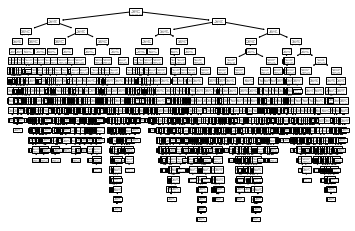

In [21]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo9 = tree.DecisionTreeClassifier(criterion='gini',max_depth=900,splitter="best",random_state=123)
modelo9.fit(X_train, y_train)
scores9 = cross_val_score(modelo9, X_train, y_train, cv=5, scoring='accuracy')
print(scores9)
print(scores9.mean())

tree.plot_tree(modelo9)
tree.export_graphviz(decision_tree=modelo9, class_names=True,out_file="Arbol LOL 9.dot")

[0.97464579 0.96619438 0.97303008 0.97228092 0.97128651]
0.9714875358546655


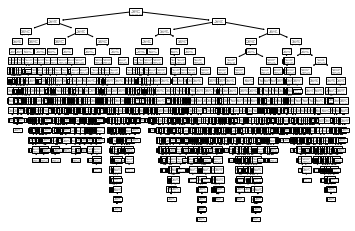

In [22]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo10 = tree.DecisionTreeClassifier(criterion='gini',max_depth=1000,splitter="best",random_state=123)
modelo10.fit(X_train, y_train)
scores10 = cross_val_score(modelo10, X_train, y_train, cv=5, scoring='accuracy')
print(scores10)
print(scores10.mean())

tree.plot_tree(modelo10)
tree.export_graphviz(decision_tree=modelo10, class_names=True,out_file="Arbol LOL 10.dot")

# Analicemos el desempeño en el conjunto de prueba

In [14]:
X_test = full_pipeline.transform(test_data)
X_test

array([[ 1.05407631, -0.97500648, -0.51924866, ..., -0.68603008,
        -0.35962024,  1.75567739],
       [-0.35823702,  1.02563421,  1.01114442, ...,  0.92966092,
         1.27810014, -0.56958073],
       [ 2.10943133,  1.02563421, -0.51924866, ...,  0.92966092,
        -1.17848043, -0.56958073],
       ...,
       [ 0.36676527,  1.02563421,  1.01114442, ..., -0.68603008,
         1.27810014,  1.75567739],
       [-0.46687651,  1.02563421, -0.51924866, ..., -0.68603008,
        -1.17848043, -0.56958073],
       [-0.26290033, -0.97500648, -0.51924866, ...,  0.92966092,
        -1.17848043, -0.56958073]])

In [47]:
y_pred1 = modelo1.predict(X_test) 
y_pred1

array([2, 2, 2, ..., 2, 1, 2])

In [25]:
y_pred2 = modelo2.predict(X_test) 
y_pred2

array([2, 2, 2, ..., 2, 1, 2])

In [26]:
y_pred3 = modelo3.predict(X_test) 
y_pred3

array([2, 2, 2, ..., 2, 1, 2])

In [27]:
y_pred4 = modelo4.predict(X_test) 
y_pred4

array([2, 2, 2, ..., 2, 1, 2])

In [28]:
y_pred5 = modelo5.predict(X_test) 
y_pred5

array([2, 2, 2, ..., 2, 1, 2])

In [29]:
y_pred6 = modelo6.predict(X_test) 
y_pred6

array([2, 2, 2, ..., 2, 1, 2])

In [30]:
y_pred7 = modelo7.predict(X_test) 
y_pred7

array([2, 2, 2, ..., 2, 1, 2])

In [31]:
y_pred8 = modelo8.predict(X_test) 
y_pred8

array([2, 2, 2, ..., 2, 1, 2])

In [32]:
y_pred9 = modelo9.predict(X_test) 
y_pred9

array([2, 2, 2, ..., 2, 1, 2])

In [49]:
y_pred10 = modelo10.predict(X_test) 
y_pred10

array([2, 2, 2, ..., 2, 1, 2])

In [16]:
y_test = test_data["winner"]

In [17]:
y_test

48896    1
22378    2
23867    2
11379    2
9665     1
        ..
14585    1
49753    1
29382    2
44684    1
15794    1
Name: winner, Length: 10058, dtype: int64

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1)

0.9707695366872141

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2)

0.9707695366872141

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.9707695366872141

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4)

0.9707695366872141

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5)

0.9707695366872141

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6)

0.9707695366872141

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7)

0.9707695366872141

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8)

0.9707695366872141

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9)

0.9707695366872141

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10)

0.9707695366872141

<h1 style="font-family: Arial; font-size:10;color:red;" align="center">Tabla 1. Accuracy</h1> 

| Modelo| Accuracy |
| --- | --- |
| 1 |0.9707 |
| 2 |0.9707 |
| 3 |0.9707 |
| 4 |0.9707 |
| 5 |0.9707 |
| 6 |0.9707 |
| 7 |0.9707 |
| 8 |0.9707 |
| 9 |0.9707 |
| 10 |0.9707 |

<h1 style="font-family: Arial; font-size:10;color:red;">Árboles de desición: criterion = entropy</h1> 

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


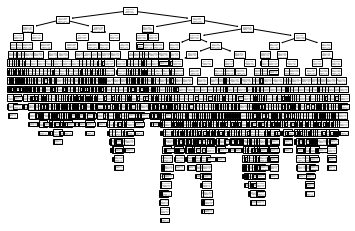

In [63]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo1b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=100,splitter="best",random_state=123)
modelo1b.fit(X_train, y_train)
scores1b = cross_val_score(modelo1b, X_train, y_train, cv=5,scoring='accuracy')
print(scores1b)
print(scores1b.mean())

tree.plot_tree(modelo1b)
tree.export_graphviz(decision_tree=modelo1b, class_names=True,out_file="Arbol LOL 1b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


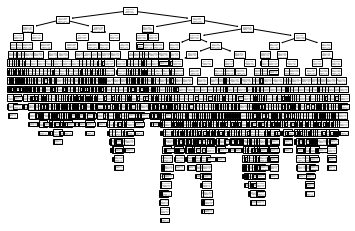

In [64]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo2b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=200,splitter="best",random_state=123)
modelo2b.fit(X_train, y_train)
scores2b = cross_val_score(modelo2b, X_train, y_train, cv=5,scoring='accuracy')
print(scores2b)
print(scores2b.mean())

tree.plot_tree(modelo2b)
tree.export_graphviz(decision_tree=modelo2b, class_names=True,out_file="Arbol LOL 2b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


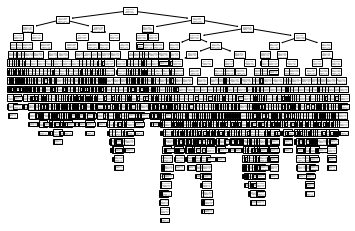

In [65]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo3b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=300,splitter="best",random_state=123)
modelo3b.fit(X_train, y_train)
scores3b = cross_val_score(modelo3b, X_train, y_train, cv=5,scoring='accuracy')
print(scores3b)
print(scores3b.mean())

tree.plot_tree(modelo3b)
tree.export_graphviz(decision_tree=modelo3b, class_names=True,out_file="Arbol LOL 3b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


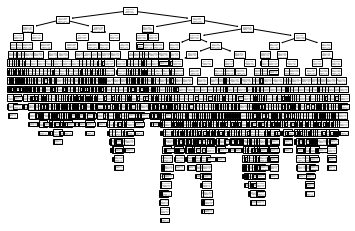

In [66]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo4b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=400,splitter="best",random_state=123)
modelo4b.fit(X_train, y_train)
scores4b = cross_val_score(modelo4b, X_train, y_train, cv=5,scoring='accuracy')
print(scores4b)
print(scores4b.mean())

tree.plot_tree(modelo4b)
tree.export_graphviz(decision_tree=modelo4b, class_names=True,out_file="Arbol LOL 4b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


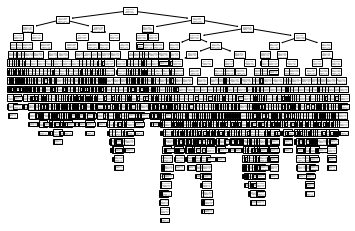

In [67]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo5b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=500,splitter="best",random_state=123)
modelo5b.fit(X_train, y_train)
scores5b = cross_val_score(modelo5b, X_train, y_train, cv=5,scoring='accuracy')
print(scores5b)
print(scores5b.mean())

tree.plot_tree(modelo5b)
tree.export_graphviz(decision_tree=modelo5b, class_names=True,out_file="Arbol LOL 5b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


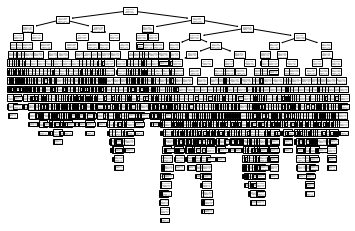

In [68]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo6b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=600,splitter="best",random_state=123)
modelo6b.fit(X_train, y_train)
scores6b = cross_val_score(modelo6b, X_train, y_train, cv=5,scoring='accuracy')
print(scores6b)
print(scores6b.mean())

tree.plot_tree(modelo6b)
tree.export_graphviz(decision_tree=modelo6b, class_names=True,out_file="Arbol LOL 6b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


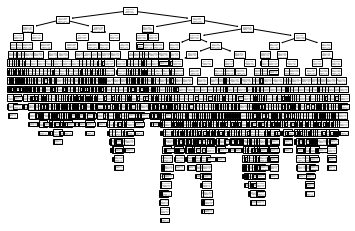

In [69]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo7b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=700,splitter="best",random_state=123)
modelo7b.fit(X_train, y_train)
scores7b = cross_val_score(modelo7b, X_train, y_train, cv=5,scoring='accuracy')
print(scores7b)
print(scores7b.mean())

tree.plot_tree(modelo7b)
tree.export_graphviz(decision_tree=modelo7b, class_names=True,out_file="Arbol LOL 7b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


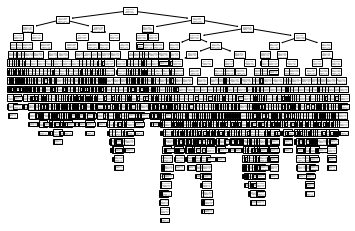

In [70]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo8b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=800,splitter="best",random_state=123)
modelo8b.fit(X_train, y_train)
scores8b = cross_val_score(modelo8b, X_train, y_train, cv=5,scoring='accuracy')
print(scores8b)
print(scores8b.mean())

tree.plot_tree(modelo8b)
tree.export_graphviz(decision_tree=modelo8b, class_names=True,out_file="Arbol LOL 8b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


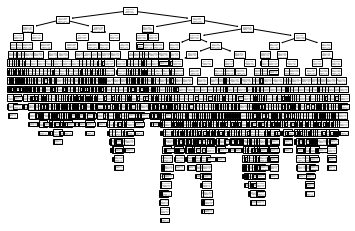

In [71]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo9b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=900,splitter="best",random_state=123)
modelo9b.fit(X_train, y_train)
scores9b = cross_val_score(modelo9b, X_train, y_train, cv=5,scoring='accuracy')
print(scores9b)
print(scores9b.mean())

tree.plot_tree(modelo9b)
tree.export_graphviz(decision_tree=modelo9b, class_names=True,out_file="Arbol LOL 9b.dot")

[0.97377579 0.96805866 0.97290579 0.97290242 0.97339963]
0.972208458912527


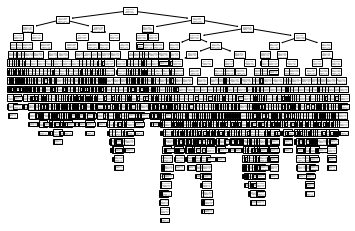

In [72]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo10b= tree.DecisionTreeClassifier(criterion='entropy',max_depth=1000,splitter="best",random_state=123)
modelo10b.fit(X_train, y_train)
scores10b = cross_val_score(modelo10b, X_train, y_train, cv=5,scoring='accuracy')
print(scores10b)
print(scores10b.mean())

tree.plot_tree(modelo10b)
tree.export_graphviz(decision_tree=modelo10b, class_names=True,out_file="Arbol LOL 10b.dot")

<h1 style="font-family: Arial; font-size:10;color:black;">Hallamos el valor de Accuracy para este conjunto de prueba</h1> 

In [74]:
y_pred1b = modelo1b.predict(X_test) 
y_pred1b

array([2, 2, 2, ..., 2, 1, 2])

In [75]:
y_pred2b = modelo2b.predict(X_test) 
y_pred2b

array([2, 2, 2, ..., 2, 1, 2])

In [76]:
y_pred3b = modelo3b.predict(X_test) 
y_pred3b

array([2, 2, 2, ..., 2, 1, 2])

In [77]:
y_pred4b = modelo4b.predict(X_test) 
y_pred4b

array([2, 2, 2, ..., 2, 1, 2])

In [78]:
y_pred5b = modelo5b.predict(X_test) 
y_pred5b

array([2, 2, 2, ..., 2, 1, 2])

In [79]:
y_pred6b = modelo6b.predict(X_test) 
y_pred6b

array([2, 2, 2, ..., 2, 1, 2])

In [80]:
y_pred7b = modelo7b.predict(X_test) 
y_pred7b

array([2, 2, 2, ..., 2, 1, 2])

In [81]:
y_pred8b = modelo8b.predict(X_test) 
y_pred8b

array([2, 2, 2, ..., 2, 1, 2])

In [82]:
y_pred9b = modelo9b.predict(X_test) 
y_pred9b

array([2, 2, 2, ..., 2, 1, 2])

In [83]:
y_pred10b = modelo10b.predict(X_test) 
y_pred10b

array([2, 2, 2, ..., 2, 1, 2])

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1b)

0.9727580035792404

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2b)

0.9727580035792404

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3b)

0.9727580035792404

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4b)

0.9727580035792404

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5b)

0.9727580035792404

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6b)

0.9727580035792404

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7b)

0.9727580035792404

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8b)

0.9727580035792404

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9b)

0.9727580035792404

In [93]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10b)

0.9727580035792404

<h1 style="font-family: Arial; font-size:10;color:red;" align="left">Tabla 2. Comparación entre resultados obtenidos variando el hiperparámetro criterion entre gini y entropy</h1> 

| Modelo| Accuracy (gini) | Accuracy (entropy) |
| --- | --- | --- |
| 1 |0.9707 |0.9727 |
| 2 |0.9707 |0.9727 |
| 3 |0.9707 |0.9727 |
| 4 |0.9707 |0.9727 |
| 5 |0.9707 |0.9727 |
| 6 |0.9707 |0.9727 |
| 7 |0.9707 |0.9727 |
| 8 |0.9707 |0.9727 |
| 9 |0.9707 |0.9727 |
| 10 |0.9707 |0.9727 |

<h1 style="font-family: Arial; font-size:10;color:red;">Árboles de desición: criterion = entropy; splitter = random</h1> 

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


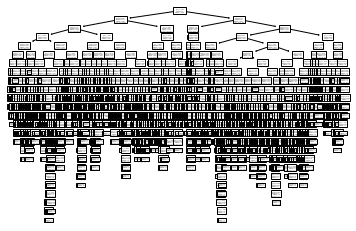

In [94]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo1c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=100,splitter="random",random_state=123)
modelo1c.fit(X_train, y_train)
scores1c = cross_val_score(modelo1c, X_train, y_train, cv=5,scoring='accuracy')
print(scores1c)
print(scores1c.mean())

tree.plot_tree(modelo1c)
tree.export_graphviz(decision_tree=modelo1c, class_names=True,out_file="Arbol LOL 1c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


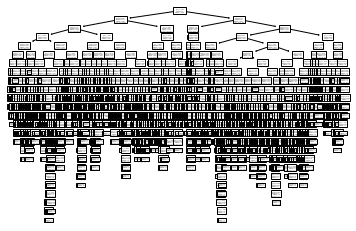

In [95]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo2c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=200,splitter="random",random_state=123)
modelo2c.fit(X_train, y_train)
scores2c = cross_val_score(modelo2c, X_train, y_train, cv=5,scoring='accuracy')
print(scores2c)
print(scores2c.mean())

tree.plot_tree(modelo2c)
tree.export_graphviz(decision_tree=modelo2c, class_names=True,out_file="Arbol LOL 2c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


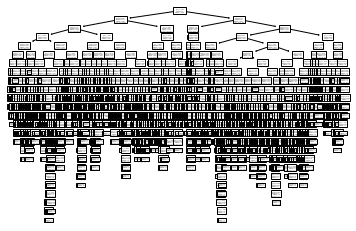

In [96]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo3c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=300,splitter="random",random_state=123)
modelo3c.fit(X_train, y_train)
scores3c = cross_val_score(modelo3c, X_train, y_train, cv=5,scoring='accuracy')
print(scores3c)
print(scores3c.mean())

tree.plot_tree(modelo3c)
tree.export_graphviz(decision_tree=modelo3c, class_names=True,out_file="Arbol LOL 3c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


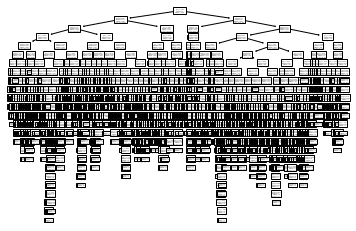

In [97]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo4c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=400,splitter="random",random_state=123)
modelo4c.fit(X_train, y_train)
scores4c = cross_val_score(modelo4c, X_train, y_train, cv=5,scoring='accuracy')
print(scores4c)
print(scores4c.mean())

tree.plot_tree(modelo4c)
tree.export_graphviz(decision_tree=modelo4c, class_names=True,out_file="Arbol LOL 4c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


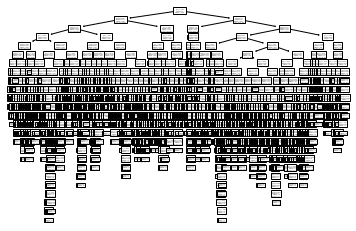

In [98]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo5c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=500,splitter="random",random_state=123)
modelo5c.fit(X_train, y_train)
scores5c = cross_val_score(modelo5c, X_train, y_train, cv=5,scoring='accuracy')
print(scores5c)
print(scores5c.mean())

tree.plot_tree(modelo5c)
tree.export_graphviz(decision_tree=modelo5c, class_names=True,out_file="Arbol LOL 5c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


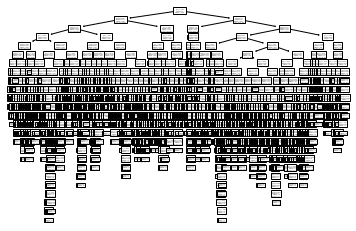

In [99]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo6c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=600,splitter="random",random_state=123)
modelo6c.fit(X_train, y_train)
scores6c = cross_val_score(modelo6c, X_train, y_train, cv=5,scoring='accuracy')
print(scores6c)
print(scores6c.mean())

tree.plot_tree(modelo6c)
tree.export_graphviz(decision_tree=modelo6c, class_names=True,out_file="Arbol LOL 6c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


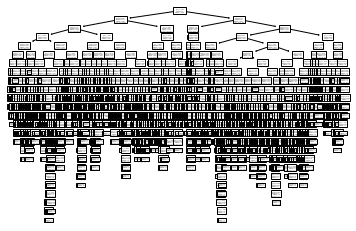

In [100]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo7c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=700,splitter="random",random_state=123)
modelo7c.fit(X_train, y_train)
scores7c = cross_val_score(modelo7c, X_train, y_train, cv=5,scoring='accuracy')
print(scores7c)
print(scores7c.mean())

tree.plot_tree(modelo7c)
tree.export_graphviz(decision_tree=modelo7c, class_names=True,out_file="Arbol LOL 7c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


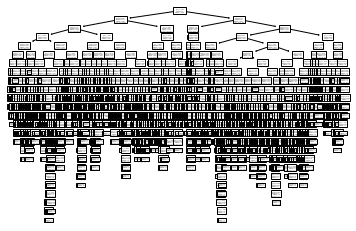

In [101]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo8c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=800,splitter="random",random_state=123)
modelo8c.fit(X_train, y_train)
scores8c = cross_val_score(modelo8c, X_train, y_train, cv=5,scoring='accuracy')
print(scores8c)
print(scores8c.mean())

tree.plot_tree(modelo8c)
tree.export_graphviz(decision_tree=modelo8c, class_names=True,out_file="Arbol LOL 8c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


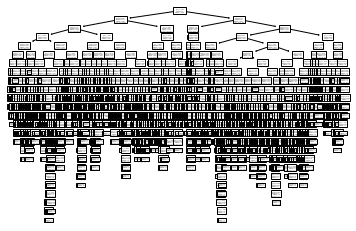

In [102]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo9c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=900,splitter="random",random_state=123)
modelo9c.fit(X_train, y_train)
scores9c = cross_val_score(modelo9c, X_train, y_train, cv=5,scoring='accuracy')
print(scores9c)
print(scores9c.mean())

tree.plot_tree(modelo9c)
tree.export_graphviz(decision_tree=modelo9c, class_names=True,out_file="Arbol LOL 9c.dot")

[0.97576435 0.96880437 0.97253294 0.97103791 0.97178372]
0.9719846587528794


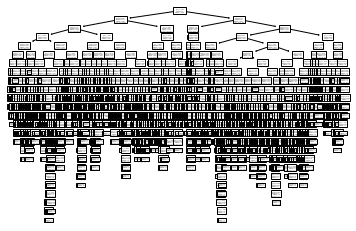

In [103]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo10c= tree.DecisionTreeClassifier(criterion='entropy',max_depth=1000,splitter="random",random_state=123)
modelo10c.fit(X_train, y_train)
scores10c = cross_val_score(modelo10c, X_train, y_train, cv=5,scoring='accuracy')
print(scores10c)
print(scores10c.mean())

tree.plot_tree(modelo10c)
tree.export_graphviz(decision_tree=modelo10c, class_names=True,out_file="Arbol LOL 10c.dot")

<h1 style="font-family: Arial; font-size:10;color:black;">Hallamos el valor de Accuracy para este conjunto de prueba</h1> 

In [104]:
y_pred1c = modelo1c.predict(X_test) 
y_pred1c

array([2, 2, 2, ..., 2, 2, 2])

In [105]:
y_pred2c = modelo2c.predict(X_test) 
y_pred2c

array([2, 2, 2, ..., 2, 2, 2])

In [106]:
y_pred3c = modelo3c.predict(X_test) 
y_pred3c

array([2, 2, 2, ..., 2, 2, 2])

In [107]:
y_pred4c = modelo4c.predict(X_test) 
y_pred4c

array([2, 2, 2, ..., 2, 2, 2])

In [108]:
y_pred5c = modelo5c.predict(X_test) 
y_pred5c

array([2, 2, 2, ..., 2, 2, 2])

In [109]:
y_pred6c = modelo6c.predict(X_test) 
y_pred6c

array([2, 2, 2, ..., 2, 2, 2])

In [110]:
y_pred7c = modelo7c.predict(X_test) 
y_pred7c

array([2, 2, 2, ..., 2, 2, 2])

In [111]:
y_pred8c = modelo8c.predict(X_test) 
y_pred8c

array([2, 2, 2, ..., 2, 2, 2])

In [112]:
y_pred9c = modelo9c.predict(X_test) 
y_pred9c

array([2, 2, 2, ..., 2, 2, 2])

In [113]:
y_pred10c = modelo10c.predict(X_test) 
y_pred10c

array([2, 2, 2, ..., 2, 2, 2])

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1c)

0.971366076754822

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2c)

0.971366076754822

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3c)

0.971366076754822

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4c)

0.971366076754822

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5c)

0.971366076754822

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6c)

0.971366076754822

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7c)

0.971366076754822

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8c)

0.971366076754822

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9c)

0.971366076754822

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10c)

0.971366076754822

<h1 style="font-family: Arial; font-size:10;color:red;" align="left">Tabla 3. Comparación entre los valores obtenidos de Accuracy variando los hiperparámetros criterion y splitter</h1> 

| Modelo| criterion: gini - splitter: best | criterion: entropy - splitter: best  | criterion: entropy - splitter: random |
| --- | --- | --- | --- |
| 1 |0.9707 |0.9727 |0.9713 |
| 2 |0.9707 |0.9727 |0.9713 |
| 3 |0.9707 |0.9727 |0.9713 |
| 4 |0.9707 |0.9727 |0.9713 |
| 5 |0.9707 |0.9727 |0.9713 |
| 6 |0.9707 |0.9727 |0.9713 |
| 7 |0.9707 |0.9727 |0.9713 |
| 8 |0.9707 |0.9727 |0.9713 |
| 9 |0.9707 |0.9727 |0.9713 |
| 10 |0.9707 |0.9727 |0.9713 |

<p style="font-family: Arial; font-size:10;color:black;">Los hiperparámetros que por el
momento permiten obtener el árbol con mayor accuracy son: criterion = entropy; splitter = best y random_state=123.</p> 

<h1 style="font-family: Arial; font-size:10;color:red;">Árboles de desición con hiperparámetro ccp_alpha</h1> 

<h1 style="font-family: Arial; font-size:10;color:black;">Variación 1</h1> 

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


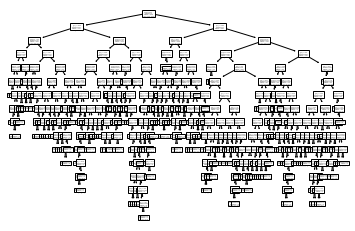

In [128]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo1d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=100,splitter="best",random_state=123)
modelo1d.fit(X_train, y_train)
scores1d = cross_val_score(modelo1d, X_train, y_train, cv=5,scoring='accuracy')
print(scores1d)
print(scores1d.mean())

tree.plot_tree(modelo1d)
tree.export_graphviz(decision_tree=modelo1d, class_names=True,out_file="Arbol LOL 1d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


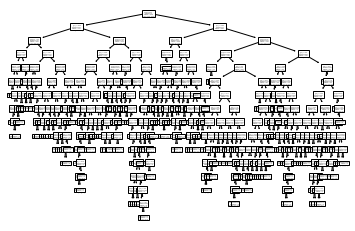

In [129]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo2d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=200,splitter="best",random_state=123)
modelo2d.fit(X_train, y_train)
scores2d = cross_val_score(modelo2d, X_train, y_train, cv=5,scoring='accuracy')
print(scores2d)
print(scores2d.mean())

tree.plot_tree(modelo2d)
tree.export_graphviz(decision_tree=modelo2d, class_names=True,out_file="Arbol LOL 2d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


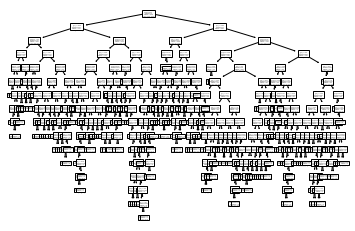

In [130]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo3d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=300,splitter="best",random_state=123)
modelo3d.fit(X_train, y_train)
scores3d = cross_val_score(modelo3d, X_train, y_train, cv=5,scoring='accuracy')
print(scores3d)
print(scores3d.mean())

tree.plot_tree(modelo3d)
tree.export_graphviz(decision_tree=modelo3d, class_names=True,out_file="Arbol LOL 3d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


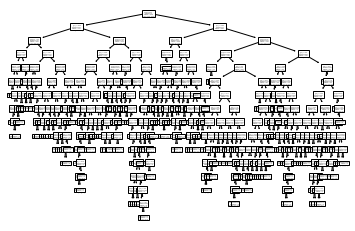

In [131]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo4d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=400,splitter="best",random_state=123)
modelo4d.fit(X_train, y_train)
scores4d = cross_val_score(modelo4d, X_train, y_train, cv=5,scoring='accuracy')
print(scores4d)
print(scores4d.mean())

tree.plot_tree(modelo4d)
tree.export_graphviz(decision_tree=modelo4d, class_names=True,out_file="Arbol LOL 4d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


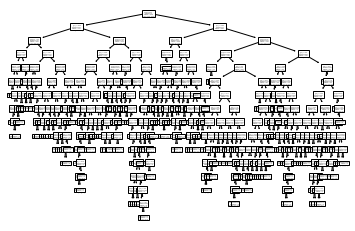

In [132]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo5d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=500,splitter="best",random_state=123)
modelo5d.fit(X_train, y_train)
scores5d = cross_val_score(modelo5d, X_train, y_train, cv=5,scoring='accuracy')
print(scores5d)
print(scores5d.mean())

tree.plot_tree(modelo5d)
tree.export_graphviz(decision_tree=modelo5d, class_names=True,out_file="Arbol LOL 5d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


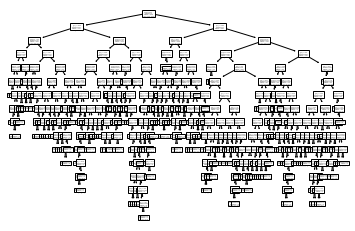

In [133]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo6d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=600,splitter="best",random_state=123)
modelo6d.fit(X_train, y_train)
scores6d = cross_val_score(modelo6d, X_train, y_train, cv=5,scoring='accuracy')
print(scores6d)
print(scores6d.mean())

tree.plot_tree(modelo6d)
tree.export_graphviz(decision_tree=modelo6d, class_names=True,out_file="Arbol LOL 6d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


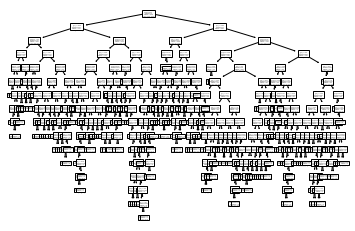

In [134]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo7d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=700,splitter="best",random_state=123)
modelo7d.fit(X_train, y_train)
scores7d = cross_val_score(modelo7d, X_train, y_train, cv=5,scoring='accuracy')
print(scores7d)
print(scores7d.mean())

tree.plot_tree(modelo7d)
tree.export_graphviz(decision_tree=modelo7d, class_names=True,out_file="Arbol LOL 7d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


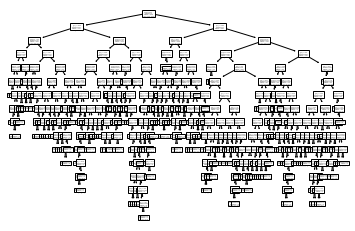

In [135]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo8d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=800,splitter="best",random_state=123)
modelo8d.fit(X_train, y_train)
scores8d = cross_val_score(modelo8d, X_train, y_train, cv=5,scoring='accuracy')
print(scores8d)
print(scores8d.mean())

tree.plot_tree(modelo8d)
tree.export_graphviz(decision_tree=modelo8d, class_names=True,out_file="Arbol LOL 8d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


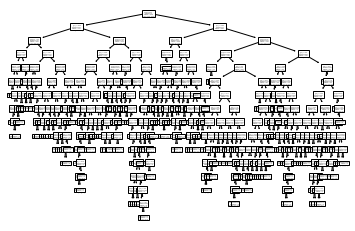

In [136]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo9d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=900,splitter="best",random_state=123)
modelo9d.fit(X_train, y_train)
scores9d = cross_val_score(modelo9d, X_train, y_train, cv=5,scoring='accuracy')
print(scores9d)
print(scores9d.mean())

tree.plot_tree(modelo9d)
tree.export_graphviz(decision_tree=modelo9d, class_names=True,out_file="Arbol LOL 9d.dot")

[0.97526721 0.96992294 0.97688292 0.97476694 0.97476694]
0.9743213903522736


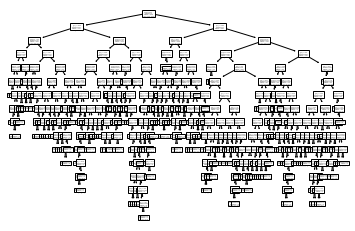

In [137]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo10d= tree.DecisionTreeClassifier(ccp_alpha = 0.0001,criterion='entropy',max_depth=1000,splitter="best",random_state=123)
modelo10d.fit(X_train, y_train)
scores10d = cross_val_score(modelo10d, X_train, y_train, cv=5,scoring='accuracy')
print(scores10d)
print(scores10d.mean())

tree.plot_tree(modelo10d)
tree.export_graphviz(decision_tree=modelo10d, class_names=True,out_file="Arbol LOL 10d.dot")

<h1 style="font-family: Arial; font-size:10;color:black;">Hallamos el valor de Accuracy para este conjunto de prueba</h1> 

In [138]:
y_pred1d = modelo1d.predict(X_test) 
y_pred1d

array([2, 2, 2, ..., 2, 1, 2])

In [139]:
y_pred2d = modelo2d.predict(X_test) 
y_pred2d

array([2, 2, 2, ..., 2, 1, 2])

In [140]:
y_pred3d = modelo3d.predict(X_test) 
y_pred3d

array([2, 2, 2, ..., 2, 1, 2])

In [141]:
y_pred4d = modelo4d.predict(X_test) 
y_pred4d

array([2, 2, 2, ..., 2, 1, 2])

In [142]:
y_pred5d = modelo5d.predict(X_test) 
y_pred5d

array([2, 2, 2, ..., 2, 1, 2])

In [143]:
y_pred6d = modelo6d.predict(X_test) 
y_pred6d

array([2, 2, 2, ..., 2, 1, 2])

In [144]:
y_pred7d = modelo7d.predict(X_test) 
y_pred7d

array([2, 2, 2, ..., 2, 1, 2])

In [145]:
y_pred8d = modelo8d.predict(X_test) 
y_pred8d

array([2, 2, 2, ..., 2, 1, 2])

In [146]:
y_pred9d = modelo9d.predict(X_test) 
y_pred9d

array([2, 2, 2, ..., 2, 1, 2])

In [147]:
y_pred10d = modelo10d.predict(X_test) 
y_pred10d

array([2, 2, 2, ..., 2, 1, 2])

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1d)

0.9761383972956851

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2d)

0.9761383972956851

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3d)

0.9761383972956851

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4d)

0.9761383972956851

In [152]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5d)

0.9761383972956851

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6d)

0.9761383972956851

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7d)

0.9761383972956851

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8d)

0.9761383972956851

In [156]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9d)

0.9761383972956851

In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10d)

0.9761383972956851

<h1 style="font-family: Arial; font-size:10;color:red;" align="left">Tabla 4. Comparación entre el valor de Accuracy mas alto obtenido anteriormente y la primera variación con ccp_alpha = 0.0001</h1> 

| Modelo| sin ccp_alpha  | ccp_alpha = 0.0001 |
| --- | --- | --- | 
| 1 |0.9727 |0.9761 |
| 2 |0.9727 |0.9761 |
| 3 |0.9727 |0.9761 |
| 4 |0.9727 |0.9761 |
| 5 |0.9727 |0.9761 |
| 6 |0.9727 |0.9761 |
| 7 |0.9727 |0.9761 |
| 8 |0.9727 |0.9761 |
| 9 |0.9727 |0.9761 |
| 10 |0.9727 |0.9761 |

<h1 style="font-family: Arial; font-size:10;color:black;">Variación 2</h1> 

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


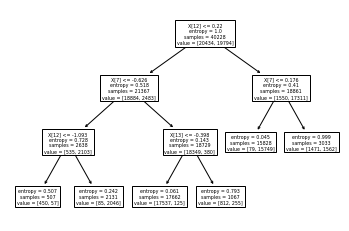

In [163]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo1e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=100,splitter="best",random_state=123)
modelo1e.fit(X_train, y_train)
scores1e = cross_val_score(modelo1e, X_train, y_train, cv=5,scoring='accuracy')
print(scores1e)
print(scores1e.mean())

tree.plot_tree(modelo1e)
tree.export_graphviz(decision_tree=modelo1e, class_names=True,out_file="Arbol LOL 1e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


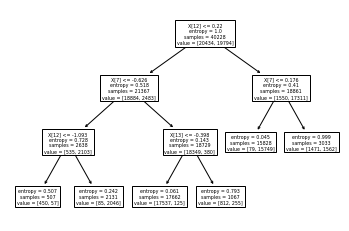

In [164]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo2e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=200,splitter="best",random_state=123)
modelo2e.fit(X_train, y_train)
scores2e = cross_val_score(modelo2e, X_train, y_train, cv=5,scoring='accuracy')
print(scores2e)
print(scores2e.mean())

tree.plot_tree(modelo2e)
tree.export_graphviz(decision_tree=modelo2e, class_names=True,out_file="Arbol LOL 2e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


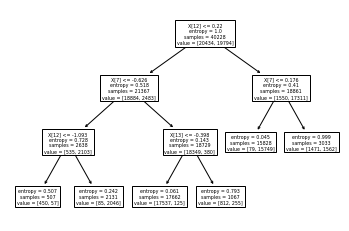

In [165]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo3e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=300,splitter="best",random_state=123)
modelo3e.fit(X_train, y_train)
scores3e = cross_val_score(modelo3e, X_train, y_train, cv=5,scoring='accuracy')
print(scores3e)
print(scores3e.mean())

tree.plot_tree(modelo3e)
tree.export_graphviz(decision_tree=modelo3e, class_names=True,out_file="Arbol LOL 3e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


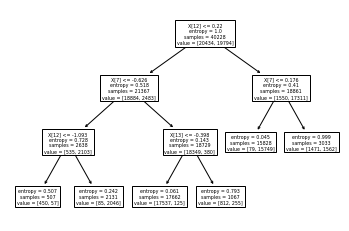

In [166]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo4e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=400,splitter="best",random_state=123)
modelo4e.fit(X_train, y_train)
scores4e = cross_val_score(modelo4e, X_train, y_train, cv=5,scoring='accuracy')
print(scores4e)
print(scores4e.mean())

tree.plot_tree(modelo4e)
tree.export_graphviz(decision_tree=modelo4e, class_names=True,out_file="Arbol LOL 4e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


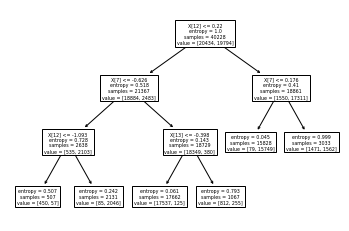

In [167]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo5e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=500,splitter="best",random_state=123)
modelo5e.fit(X_train, y_train)
scores5e = cross_val_score(modelo5e, X_train, y_train, cv=5,scoring='accuracy')
print(scores5e)
print(scores5e.mean())

tree.plot_tree(modelo5e)
tree.export_graphviz(decision_tree=modelo5e, class_names=True,out_file="Arbol LOL 5e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


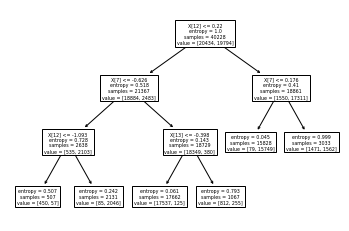

In [168]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo6e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=600,splitter="best",random_state=123)
modelo6e.fit(X_train, y_train)
scores6e = cross_val_score(modelo6e, X_train, y_train, cv=5,scoring='accuracy')
print(scores6e)
print(scores6e.mean())

tree.plot_tree(modelo6e)
tree.export_graphviz(decision_tree=modelo6e, class_names=True,out_file="Arbol LOL 6e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


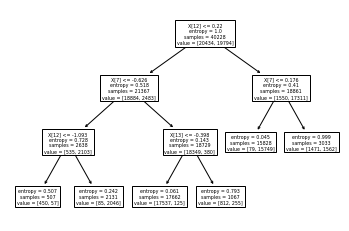

In [169]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo7e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=700,splitter="best",random_state=123)
modelo7e.fit(X_train, y_train)
scores7e = cross_val_score(modelo7e, X_train, y_train, cv=5,scoring='accuracy')
print(scores7e)
print(scores7e.mean())

tree.plot_tree(modelo7e)
tree.export_graphviz(decision_tree=modelo7e, class_names=True,out_file="Arbol LOL 7e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


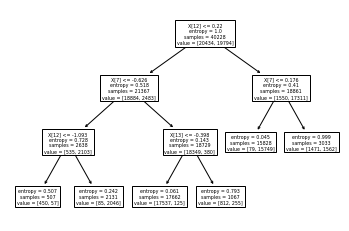

In [170]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo8e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=800,splitter="best",random_state=123)
modelo8e.fit(X_train, y_train)
scores8e = cross_val_score(modelo8e, X_train, y_train, cv=5,scoring='accuracy')
print(scores8e)
print(scores8e.mean())

tree.plot_tree(modelo8e)
tree.export_graphviz(decision_tree=modelo8e, class_names=True,out_file="Arbol LOL 8e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


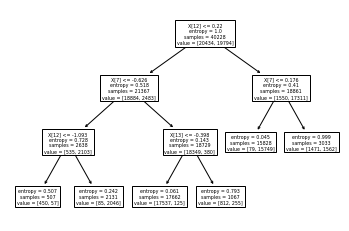

In [171]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo9e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=900,splitter="best",random_state=123)
modelo9e.fit(X_train, y_train)
scores9e = cross_val_score(modelo9e, X_train, y_train, cv=5,scoring='accuracy')
print(scores9e)
print(scores9e.mean())

tree.plot_tree(modelo9e)
tree.export_graphviz(decision_tree=modelo9e, class_names=True,out_file="Arbol LOL 9e.dot")

[0.94954014 0.94606015 0.95215014 0.94369173 0.95102548]
0.9484935301321318


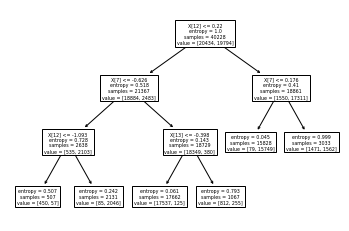

In [172]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

modelo10e= tree.DecisionTreeClassifier(ccp_alpha = 0.01,criterion='entropy',max_depth=1000,splitter="best",random_state=123)
modelo10e.fit(X_train, y_train)
scores10e = cross_val_score(modelo10e, X_train, y_train, cv=5,scoring='accuracy')
print(scores10e)
print(scores10e.mean())

tree.plot_tree(modelo10e)
tree.export_graphviz(decision_tree=modelo10e, class_names=True,out_file="Arbol LOL 10e.dot")

<h1 style="font-family: Arial; font-size:10;color:black;">Hallamos el valor de Accuracy para este conjunto de prueba</h1> 

In [173]:
y_pred1e = modelo1e.predict(X_test) 
y_pred1e

array([2, 2, 2, ..., 2, 1, 2])

In [174]:
y_pred2e = modelo2e.predict(X_test) 
y_pred2e

array([2, 2, 2, ..., 2, 1, 2])

In [175]:
y_pred3e = modelo3e.predict(X_test) 
y_pred3e

array([2, 2, 2, ..., 2, 1, 2])

In [176]:
y_pred4e = modelo4e.predict(X_test) 
y_pred4e

array([2, 2, 2, ..., 2, 1, 2])

In [177]:
y_pred5e = modelo5e.predict(X_test) 
y_pred5e

array([2, 2, 2, ..., 2, 1, 2])

In [178]:
y_pred6e = modelo6e.predict(X_test) 
y_pred6e

array([2, 2, 2, ..., 2, 1, 2])

In [179]:
y_pred7e = modelo7e.predict(X_test) 
y_pred7e

array([2, 2, 2, ..., 2, 1, 2])

In [180]:
y_pred8e = modelo8e.predict(X_test) 
y_pred8e

array([2, 2, 2, ..., 2, 1, 2])

In [181]:
y_pred9e = modelo9e.predict(X_test) 
y_pred9e

array([2, 2, 2, ..., 2, 1, 2])

In [182]:
y_pred10e = modelo10e.predict(X_test) 
y_pred10e

array([2, 2, 2, ..., 2, 1, 2])

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1e)

0.9475044740505071

In [184]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred2e)

0.9475044740505071

In [185]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3e)

0.9475044740505071

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred4e)

0.9475044740505071

In [187]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred5e)

0.9475044740505071

In [188]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred6e)

0.9475044740505071

In [189]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred7e)

0.9475044740505071

In [190]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred8e)

0.9475044740505071

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred9e)

0.9475044740505071

In [192]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred10e)

0.9475044740505071

<h1 style="font-family: Arial; font-size:10;color:red;" align="left">Tabla 5. Comparación entre el valor de Accuracy mas alto obtenido anteriormente, la primera variación con ccp_alpha = 0.0001 y la segunda variación con ccp_alpha = 0.01</h1> 

| Modelo| sin ccp_alpha  | ccp_alpha = 0.0001 | ccp_alpha = 0.01 |
| --- | --- | --- | --- | 
| 1 |0.9727 |0.9761 |0.9475 |
| 2 |0.9727 |0.9761 |0.9475 |
| 3 |0.9727 |0.9761 |0.9475 |
| 4 |0.9727 |0.9761 |0.9475 |
| 5 |0.9727 |0.9761 |0.9475 |
| 6 |0.9727 |0.9761 |0.9475 |
| 7 |0.9727 |0.9761 |0.9475 |
| 8 |0.9727 |0.9761 |0.9475 |
| 9 |0.9727 |0.9761 |0.9475 |
| 10 |0.9727 |0.9761 |0.9475 |

<p style="font-family: Arial; font-size:10;color:black;">El Minimal Cost-Complexity Pruning, o poda mínima de complejidad de costos proporciona una opción para encontrar un árbol más sencillo (menor tamaño) que consiga mejores resultados de predicción. Este método también se conoce como el algoritmo de CART y consiste en dos pasos: generar una serie de árboles cada vez más podados {T0,T1,T2, ..., Tn} y seleccionar el mejor árbol con la tasa de error mas baja en un conjunto de pruebas separado.
    
El hiperparámetro ccp_alpha sirve a su vez como parámetro para este algoritmo, el cual se conoce también como Complexity Parameter. Cuanto mayor es este valor, más agresivo es el podado y menor el tamaño del árbol resultante.</p> 

<p style="font-family: Arial; font-size:10;color:black;">Podemos observar que utilizando el hiperparámetro ccp_alpha y otorgándole un valor de 0.0001 en comparación con un valor mayor de 0.01 nos brinda un valor de Accuracy mas alto. Podar el árbol usando este hiperparámetro mejoró no solo los resultados obtenidos a través del árbol de desición, también mejoró los tiempos de ejecución.</p>

<h1 style="font-family: Arial; font-size:10;color:black;">Entrenamiento de un modelo con Gaussian Naive Bayes</h1> 

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

modelo1f = GaussianNB(var_smoothing=0.001)
modelo1f.fit(X_train, y_train)
scores1f = cross_val_score(modelo1f, X_train, y_train, cv=5,scoring='accuracy')
scores1f.mean()

0.9499105377145429

<h1 style="font-family: Arial; font-size:10;color:black;">Analicemos el desempeño en el conjunto de prueba</h1> 

In [15]:
y_pred1f = modelo1f.predict(X_test)
y_pred1f

array([1, 2, 2, ..., 2, 1, 1])

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred1f)

0.9496917876317359

<p style="font-family: Arial; font-size:22;color:black;">El valor de Accuracy obtenido usando Gaussian Naive Bayes fue de 0.9496</p> 

<p style="font-family: Arial; font-size:22;color:black;">Observamos que para este problema, con la combinación de hiperparámetros seleccionados para cada caso, se obtuvo un valor de Accuracy mas alto usando la técnica de Redes Neurales, el cual fue de 0.9811</p> 